### Decision Tree Project

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc

### Import Dataset

In [2]:
df = pd.read_csv("C:/Users/soura/OneDrive/Desktop/Vaibhav DS/Datasets/iphone_purchase_records.csv")

In [3]:
print(df)

     Gender  Age  Salary  Purchase Iphone
0      Male   19   19000                0
1      Male   35   20000                0
2    Female   26   43000                0
3    Female   27   57000                0
4      Male   19   76000                0
..      ...  ...     ...              ...
395  Female   46   41000                1
396    Male   51   23000                1
397  Female   50   20000                1
398    Male   36   33000                0
399  Female   49   36000                1

[400 rows x 4 columns]


In [4]:
df.dtypes

Gender             object
Age                 int64
Salary              int64
Purchase Iphone     int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [6]:
df.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [7]:
df.shape

(400, 4)

#### Data Visualization

C:\Users\soura\AppData\Local\Temp\ipykernel_8064\3946919836.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

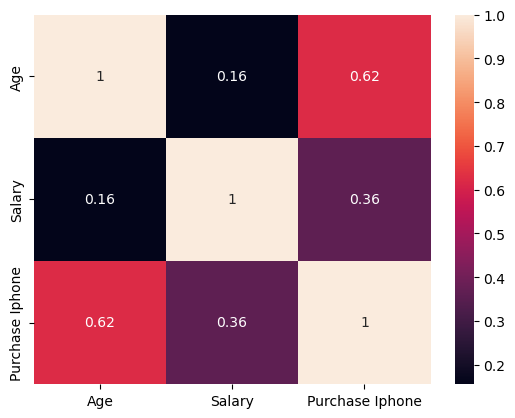

In [8]:
corr = df.corr()
sns.heatmap(corr, annot = True)

In [9]:
df

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


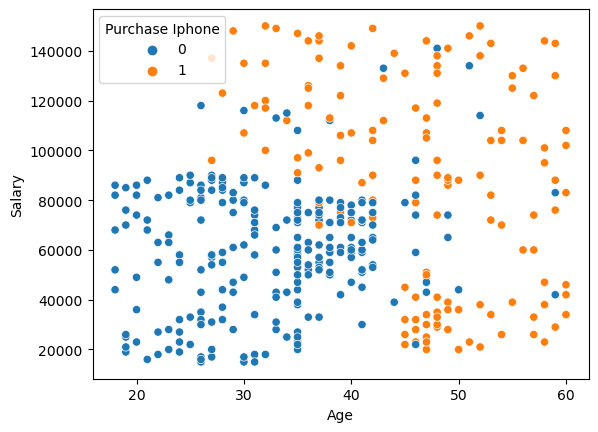

In [10]:
sns.scatterplot(x=df['Age'], y=df['Salary'], hue = df['Purchase Iphone'], data=df) 
plt.show()

In [11]:
df.replace({"Gender": {'Female':0, 'Male':1}},inplace =True)
df

,Gender,Age,Salary,Purchase Iphone
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


### Separating the data into x & y

In [12]:
y = df['Purchase Iphone']
X = df[['Age','Salary']]
print(y)
print(X)


0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64
     Age  Salary
0     19   19000
1     35   20000
2     26   43000
3     27   57000
4     19   76000
..   ...     ...
395   46   41000
396   51   23000
397   50   20000
398   36   33000
399   49   36000

[400 rows x 2 columns]


### Splitting Dataset into Train & Test

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [14]:
print(X_train.shape)
print(y_test.shape)

(320, 2)
(80,)


In [15]:
X_train

,Age,Salary
3,27,57000
18,46,28000
202,39,134000
250,44,39000
274,57,26000
...,...,...
71,24,27000
106,26,35000
270,43,133000
348,39,77000


### Model evaluation

In [16]:

decisiontree_model = DecisionTreeClassifier(criterion= 'entropy', random_state=1234)
decisiontree_model.fit(X_train,y_train)

print("Training the models")

Training the models


In [17]:

y_pred_ds  = decisiontree_model.predict(X_test)

In [18]:
confusion_matrix(y_test,y_pred_ds)

array([[46,  6],
       [ 7, 21]], dtype=int64)

### Checking Accuracy

In [19]:
accuracy_score(y_test,y_pred_ds)*100

83.75

In [20]:
y_pred_ds  = decisiontree_model.predict_proba(X_test)[:,1]

In [21]:
y_pred_ds

array([1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.])

In [22]:
test_df = pd.DataFrame({'Actual':y_test, 'Decision_Tree': y_pred_ds})
test_df

,Actual,Decision_Tree
209,0,1.0
280,1,1.0
33,0,0.0
210,1,0.0
93,0,0.0
...,...,...
246,0,0.0
227,1,1.0
369,1,1.0
176,0,0.0


## Accuracy of the model is 83.75 %. Which means model has fitted very well

In [24]:
import joblib

joblib.dump(decisiontree_model,'iphone_purchase_prj_8.sav')

['iphone_purchase_prj_8.sav']